# NLTK Chapter 11

## Managing Linguistic Data

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch11.html "ch11").*

### 1   Corpus Structure: a Case Study

#### 1.1   The Structure of TIMIT

We can acces a sample from the TIMIT corpus thusly:

In [423]:
import nltk

from nltk.corpus import timit as TT

TT.fileids()[:8]

['dr1-fvmh0/sa1.phn',
 'dr1-fvmh0/sa1.txt',
 'dr1-fvmh0/sa1.wav',
 'dr1-fvmh0/sa1.wrd',
 'dr1-fvmh0/sa2.phn',
 'dr1-fvmh0/sa2.txt',
 'dr1-fvmh0/sa2.wav',
 'dr1-fvmh0/sa2.wrd']

Each filename has this internal structure:

In [424]:
from IPython.display import display, Image

# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\timit.png"))

The (rather idiosyncratic) phonetic transcription can be accessed with `phones()`:

In [425]:
phonetic = TT.phones('dr1-fvmh0/sa1')
print(phonetic, end = ' ')

['h#', 'sh', 'iy', 'hv', 'ae', 'dcl', 'y', 'ix', 'dcl', 'd', 'aa', 'kcl', 's', 'ux', 'tcl', 'en', 'gcl', 'g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax', 'q', 'ao', 'l', 'y', 'ih', 'ax', 'h#'] 

In [426]:
print(TT.word_times('dr1-fvmh0/sa1'), end = ' ')

[('she', 7812, 10610), ('had', 10610, 14496), ('your', 14496, 15791), ('dark', 15791, 20720), ('suit', 20720, 25647), ('in', 25647, 26906), ('greasy', 26906, 32668), ('wash', 32668, 37890), ('water', 38531, 42417), ('all', 43091, 46052), ('year', 46052, 50522)] 

For reference, there is a lexicon with the canonical pronunciation of every word:

In [427]:
timitdict = nltk.corpus.timit.transcription_dict()
timitdict['greasy'] + timitdict['wash'] + timitdict['water']

['g', 'r', 'iy1', 's', 'iy', 'w', 'ao1', 'sh', 'w', 'ao1', 't', 'axr']

In [428]:
phonetic[17:30]

['g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax']

We also have access to demographic info on the speakers:

In [429]:
TT.spkrinfo('dr1-fvmh0')

SpeakerInfo(id='VMH0', sex='F', dr='1', use='TRN', recdate='03/11/86', birthdate='01/08/60', ht='5\'05"', race='WHT', edu='BS', comments='BEST NEW ENGLAND ACCENT SO FAR')

#### 1.2   Notable Design Features

*__Figure 1.2__: Structure of the Published TIMIT Corpus: The CD-ROM contains doc, train, and test directories at the top level; the train and test directories both have 8 sub-directories, one per dialect region; each of these contains further subdirectories, one per speaker; the contents of the directory for female speaker aks0 are listed, showing 10 wav files accompanied by a text transcription, a word-aligned transcription, and a phonetic transcription.*

In [430]:
# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\timit-structure.png"))

#### 1.3   Fundamental Data Types

*__Figure 1.3__: Basic Linguistic Data Types — Lexicons and Texts: amid their diversity, lexicons have a record structure, while annotated texts have a temporal organization.*

In [431]:
# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\datatypes.png"))

### 2   The Life-Cycle of a Corpus

#### 2.1 Three Corpus Creation Scenarios

*__No notes.__*

#### 2.2 Quality Control 

*__Figure 2.1__: Three Segmentations of a Sequence: The small rectangles represent characters, words, sentences, in short, any sequence which might be divided into linguistic units; $S_1$ and $S_2$ are in close agreement, but both differ significantly from $S_3$.*




In [432]:
# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\windowdiff.png"))

We can use `windowdiff` to measure similarity.  The last argument is the window size, which can be modified to control the sensitivity of the measure:

In [433]:
s1 = "00000010000000001000000"
s2 = "00000001000000010000000"
s3 = "00010000000000000001000"
nltk.windowdiff(s1, s1, 3)

0.0

In [434]:
nltk.windowdiff(s1, s2, 3)

0.19047619047619047

In [435]:
nltk.windowdiff(s2, s3, 3)

0.5714285714285714

*Here's a plot showing how sensitivity varies by window size.  There's no clear pattern here.*

In [436]:
%matplotlib inline

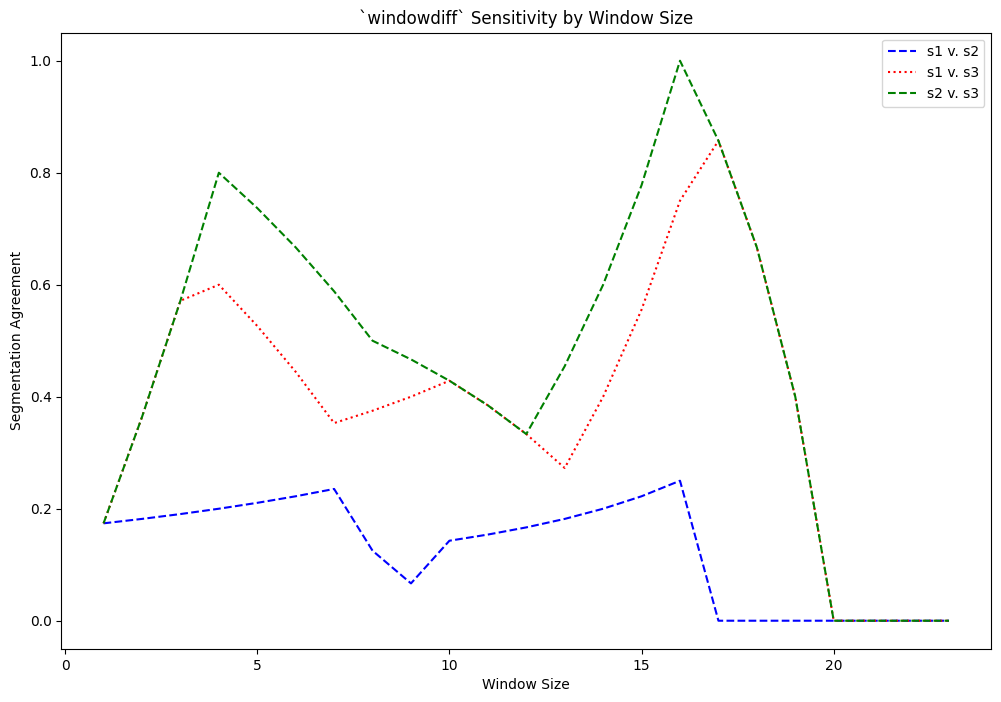

In [437]:
import matplotlib.pyplot as plt

X = range(1, 24)

s1_s2 = [nltk.windowdiff(s1, s2, i) for i in X]
s1_s3 = [nltk.windowdiff(s1, s3, i) for i in X]
s2_s3 = [nltk.windowdiff(s2, s3, i) for i in X]

plt.figure(figsize = (12, 8))
plt.plot(X, s1_s2, 'b--', label = 's1 v. s2')
plt.plot(X, s1_s3, 'r:', label = 's1 v. s3')
plt.plot(X, s2_s3, 'g--', label = 's2 v. s3')
plt.title("`windowdiff` Sensitivity by Window Size")
plt.xlabel('Window Size')
plt.ylabel('Segmentation Agreement')
plt.legend()
plt.show()

#### 2.3   Curation vs Evolution

*__Figure 2.2__: Evolution of a Corpus over Time: After a corpus is published, research groups will use it independently, selecting and enriching different pieces; later research that seeks to integrate separate annotations confronts the difficult challenge of aligning the annotations.*

In [438]:
# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\evolution.png"))

### 3   Acquiring Data

#### 3.1   Obtaining Data from the Web

*__No notes__*

#### 3.2   Obtaining Data from Word Processor Files

Many corpora are created with word processors. While word processors have macro functions, they aren't sophisticated enough to handle searching for sets of classes.  However, if we convert the file to HTML, we can inspect the resulting file.

```
<p class=MsoNormal>sleep
  <span style='mso-spacerun:yes'> </span>
  [<span class=SpellE>sli:p</span>]
  <span style='mso-spacerun:yes'> </span>
  <b><span style='font-size:11.0pt'>v.i.</span></b>
  <span style='mso-spacerun:yes'> </span>
  <i>a condition of body and mind ...<o:p></o:p></i>
</p>
```

*__N.B.__: I cut and paste this text and saved it in a file named `dict.htm`.  Converting a text in the current version of MSWord to HTML produces something much, much different.*


If we know that the part-of-speech field is saved in 11-point font, we could look for text inside a `<span
style='font-size:11.0pt'>` element.  

In [439]:
import os, re

# path = 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk'

# os.chdir(path)

In [440]:
legal_pos = set(['n', 'v.t', 'v.i', 'adj', 'det'])
pattern = re.compile(r"'font-size:11.0pt'>([a-z.]+)<")
document = open("data/dict.htm", encoding = "windows-1252").read()
used_pos = set(re.findall(pattern, document))
illegal_pos = used_pos.difference(legal_pos)
print(list(illegal_pos))

['v.i.']


The code below strips out HTML markup and extracts the words and their pronunciations into CSV.  I changed the code in the second cell slightly - without the changes the CSV file would not change, and we could not look at that resulting file:

In [441]:
from bs4 import BeautifulSoup

def lexical_data(html_file, encoding = 'utf-8'):
    SEP = '_ENTRY'
    html = open(html_file, encoding = encoding).read()
    html = re.sub(r'<p', SEP + '<p', html)
    text = BeautifulSoup(html, 'html.parser').get_text()
    text = ' '.join(text.split())
    for entry in text.split(SEP):
        if entry.count(' ') > 2:
            yield entry.split(' ', 3)

In [442]:
import csv

df = open("output/dict1.csv", "w", encoding = 'utf-8')
writer = csv.writer(df)
writer.writerows(lexical_data("data/dict.htm", encoding = 'windows-1252'))
df.close()

#### 3.3   Obtaining Data from Spreadsheets and Databases

Using text from the book to create `dict.csv`, and carrying out the query laid out in the book: *select all words that appear in example sentences for which no dictionary entry is provided.*

In [443]:
import csv
lexicon = csv.reader(open('data/dict.csv'))
pairs = [(lexeme, defn) for (lexeme, _, _, defn) in lexicon]
lexemes, defns = zip(*pairs)
defn_words = set(w for defn in defns for w in defn.split())
print(sorted(defn_words.difference(lexemes)), end = ' ')

['...', 'a', 'and', 'body', 'by', 'cease', 'condition', 'down', 'each', 'foot', 'lifting', 'mind', 'of', 'progress', 'setting', 'to'] 

#### 3.4   Converting Data Formats

Here is code mapping the words in the dictionary definitions (cf. above) to their definitions:

In [444]:
idx = nltk.Index((defn_word, lexeme)
                for (lexeme, defn) in pairs
                for defn_word in nltk.word_tokenize(defn)
                if len(defn_word) > 3)
            

In [445]:
with open("data/dict.idx", "w") as idx_file:
    for word in sorted(idx):
        idx_words = ', '.join(idx[word])
        idx_line = "{}: {}".format(word, idx_words)
        print(idx_line, file = idx_file)

Here is the resulting `dict.idx` file:

```
body: sleep
cease: wake
condition: sleep
down: walk
each: walk
foot: walk
lifting: walk
mind: sleep
progress: walk
setting: walk
sleep: wake
```

#### 3.5   Deciding Which Layers of Annotation to Include

Commonly provided annotation layers:


* Word Tokenization: The orthographic form of text does not unambiguously identify its tokens. A tokenized and normalized version, in addition to the conventional orthographic version, may be a very convenient resource.
* Sentence Segmentation: As we saw in [3](https://www.nltk.org/book/ch03.html#chap-words), sentence segmentation can be more difficult than it seems. Some corpora therefore use explicit annotations to mark sentence segmentation.
* Paragraph Segmentation: Paragraphs and other structural elements (headings, chapters, etc.) may be explicitly annotated.
* Part of Speech: The syntactic category of each word in a document.
* Syntactic Structure: A tree structure showing the constituent structure of a sentence.
* Shallow Semantics: Named entity and coreference annotations, semantic role labels.
* Dialogue and Discourse: dialogue act tags, rhetorical structure


#### 3.6   Standards and Tools

*__Figure 3.2__: A Common Format vs A Common Interface*



In [446]:
# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\three-layer-arch.png"))

#### 3.7   Special Considerations when Working with Endangered Languages

One problem with endangered languages is that there may not be an established orthography. Here's a program that permits lookup by pronunciation similarity.  It identifies confusible letter sequences and maps complex versions to simpler versions.

In [447]:
mappings = [('ph', 'f'), ('ght', 't'), ('^kn', 'n'), ('qu', 'kw'),
            ('[aeiou]+', 'a'), (r'(.)\1', r'\1')]

def signature(word):
    for patt, repl in mappings:
        word = re.sub(patt, repl, word)
    pieces = re.findall('[^aeiou]+', word)
    return ''.join(char for piece in pieces for char in sorted(piece))[:8]

In [448]:
signature('illefent')

'lfnt'

In [449]:
signature('ebsekwieous')

'bskws'

In [450]:
signature('nuculerr')

'nclr'

Now we can create a mapping from signatures to words so that we can create candidate corrections for a given input:

In [451]:
signatures = nltk.Index((signature(w), w) for w in nltk.corpus.words.words())

In [452]:
signatures[signature('nuculerr')]

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unicolor',
 'uniocular',
 'unocular']

Next we can rank the results by their similarity with the original word:

In [453]:
def rank(word, wordlist):
    ranked = sorted((nltk.edit_distance(word, w), w) for w in wordlist)
    return [word for(_, word) in ranked]

def fuzzy_spell(word):
    sig = signature(word)
    if sig in signatures:
        return rank(word, signatures[sig])
    else:
        return []

In [454]:
fuzzy_spell('illefent')

['olefiant', 'elephant', 'oliphant', 'elephanta']

In [455]:
fuzzy_spell('ebsekwieous')

['obsequious']

In [456]:
fuzzy_spell('nucular')

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unocular',
 'uniocular',
 'unicolor']

### 4   Working with XML

#### 4.1   Using XML for Linguistic Structures

Simple lexical entry in XML:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss>any of the larger cetacean mammals having a streamlined
    body and breathing through a blowhole on the head</gloss>
</entry>

```

Here is a entry with links to WordNet via the `<synset>` tags:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <sense>
    <gloss>any of the larger cetacean mammals having a streamlined
      body and breathing through a blowhole on the head</gloss>
    <synset>whale.n.02</synset>
  </sense>
  <sense>
    <gloss>a very large person; impressive in size or qualities</gloss>
    <synset>giant.n.04</synset>
  </sense>
</entry>
```

Another way to do the same would be with __XML attributes__:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss synset="whale.n.02">any of the larger cetacean mammals having
      a streamlined body and breathing through a blowhole on the head</gloss>
  <gloss synset="giant.n.04">a very large person; impressive in size or
      qualities</gloss>
</entry>

```

#### 4.2  The Role of XML

*__No notes__*

#### 4.3 The ElementTree Interface

Accessing the Shakespeare corpus with ElementTree

In [457]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
raw = open(merchant_file).read()
print(raw[:163])

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Merchant of Venice</TITLE>


In [458]:
print(raw[1789:2006])

<TITLE>ACT I</TITLE>

<SCENE><TITLE>SCENE I.  Venice. A street.</TITLE>
<STAGEDIR>Enter ANTONIO, SALARINO, and SALANIO</STAGEDIR>

<SPEECH>
<SPEAKER>ANTONIO</SPEAKER>
<LINE>In sooth, I know not why I am so sad:</LINE>


In [459]:
from xml.etree.ElementTree import ElementTree
merchant = ElementTree().parse(merchant_file)
merchant

<Element 'PLAY' at 0x0000012299CB54E0>

In [460]:
merchant[0]

<Element 'TITLE' at 0x0000012299CB43B0>

In [461]:
merchant[0].text

'The Merchant of Venice'

The function `.getchildren()` is being deprecated, so we need to use `list()` instead:

In [462]:
list(merchant)

[<Element 'TITLE' at 0x0000012299CB43B0>,
 <Element 'PERSONAE' at 0x0000012299CB4F90>,
 <Element 'SCNDESCR' at 0x0000012299CB40E0>,
 <Element 'PLAYSUBT' at 0x0000012299CB50D0>,
 <Element 'ACT' at 0x0000012299CB4450>,
 <Element 'ACT' at 0x0000012297950BD0>,
 <Element 'ACT' at 0x0000012299770D60>,
 <Element 'ACT' at 0x00000122979B1350>,
 <Element 'ACT' at 0x0000012297885990>]

Digging down into the text:

In [463]:
merchant[-2][0].text

'ACT IV'

In [464]:
merchant[-2][1]

<Element 'SCENE' at 0x00000122979B17B0>

In [465]:
merchant[-2][1][0].text

'SCENE I.  Venice. A court of justice.'

In [466]:
merchant[-2][1][54]

<Element 'SPEECH' at 0x0000012299785670>

In [467]:
merchant[-2][1][54][0].text

'PORTIA'

In [468]:
merchant[-2][1][54][1]

<Element 'LINE' at 0x00000122997849F0>

In [469]:
merchant[-2][1][54][1].text

"The quality of mercy is not strain'd,"

__Your Turn:__ Repeat some of the above methods, for one of the other Shakespeare plays included in the corpus, such as *Romeo and Juliet* or *Macbeth*; for a list, see `nltk.corpus.shakespeare.fileids()`.

In [470]:
nltk.corpus.shakespeare.fileids()

['a_and_c.xml',
 'dream.xml',
 'hamlet.xml',
 'j_caesar.xml',
 'macbeth.xml',
 'merchant.xml',
 'othello.xml',
 'r_and_j.xml']

Looking at *Anthony and Cleopatra*:

In [471]:
ac_file = nltk.data.find('corpora/shakespeare/a_and_c.xml')
raw = open(ac_file).read()
print(raw[:163])

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Tragedy of Antony and Cleo


In [472]:
print(raw[2203:2431])

<TITLE>ACT I</TITLE>

<SCENE><TITLE>SCENE I.  Alexandria. A room in CLEOPATRA's palace.</TITLE>
<STAGEDIR>Enter DEMETRIUS and PHILO</STAGEDIR>

<SPEECH>
<SPEAKER>PHILO</SPEAKER>
<LINE>Nay, but this dotage of our general's</LINE>


In [473]:
ac = ElementTree().parse(ac_file)
ac

<Element 'PLAY' at 0x00000122970C2C00>

In [474]:
list(ac)

[<Element 'TITLE' at 0x00000122970C2FC0>,
 <Element 'PERSONAE' at 0x00000122970C2F20>,
 <Element 'SCNDESCR' at 0x00000122970C0090>,
 <Element 'PLAYSUBT' at 0x00000122970C01D0>,
 <Element 'ACT' at 0x00000122970C20C0>,
 <Element 'ACT' at 0x0000012299C5A020>,
 <Element 'ACT' at 0x0000012299C53BA0>,
 <Element 'ACT' at 0x000001229793B560>,
 <Element 'ACT' at 0x00000122979F6B60>]

In [475]:
ac[-3][0].text

'ACT III'

In [476]:
ac[-3][2][10][1].text

'O Antony! O thou Arabian bird!'

More convenient is to search for sub-elements by using the tags.  We can iterate over the types with `findall()` to find specific strings:

In [477]:
for i, act in enumerate(merchant.findall('ACT')):
    for j, scene in enumerate(act.findall('SCENE')):
        for k, speech in enumerate(scene.findall('SPEECH')):
            for line in speech.findall('LINE'):
                if 'music' in str(line.text):
                    print("Act {} Scene {} Speech {}: {}".format(i + 1,
                                                                 j + 1,
                                                                 k + 1,
                                                                 line.text))

Act 3 Scene 2 Speech 9: Let music sound while he doth make his choice;
Act 3 Scene 2 Speech 9: Fading in music: that the comparison
Act 3 Scene 2 Speech 9: And what is music then? Then music is
Act 5 Scene 1 Speech 23: And bring your music forth into the air.
Act 5 Scene 1 Speech 23: Here will we sit and let the sounds of music
Act 5 Scene 1 Speech 23: And draw her home with music.
Act 5 Scene 1 Speech 24: I am never merry when I hear sweet music.
Act 5 Scene 1 Speech 25: Or any air of music touch their ears,
Act 5 Scene 1 Speech 25: By the sweet power of music: therefore the poet
Act 5 Scene 1 Speech 25: But music for the time doth change his nature.
Act 5 Scene 1 Speech 25: The man that hath no music in himself,
Act 5 Scene 1 Speech 25: Let no such man be trusted. Mark the music.
Act 5 Scene 1 Speech 29: It is your music, madam, of the house.
Act 5 Scene 1 Speech 32: No better a musician than the wren.


We can also search for particular embedded elements to see who speaks the most often:

In [478]:
from collections import Counter
speaker_seq = [s.text for s in merchant.findall('ACT/SCENE/SPEECH/SPEAKER')]
speaker_freq = Counter(speaker_seq)
top5 = speaker_freq.most_common(5)
top5

[('PORTIA', 117),
 ('SHYLOCK', 79),
 ('BASSANIO', 73),
 ('GRATIANO', 48),
 ('ANTONIO', 47)]

Looking for patterns in who follows whom in the dialogues.  First, we'll reduce the number of speakers to the top 5:

In [479]:
from collections import defaultdict
abbreviate = defaultdict(lambda: 'OTH')
for speaker, _ in top5:
    abbreviate[speaker] = speaker[:4]
    
speaker_seq2 = [abbreviate[speaker] for speaker in speaker_seq]
cfd = nltk.ConditionalFreqDist(nltk.bigrams(speaker_seq2))
cfd.tabulate()

     ANTO BASS GRAT  OTH PORT SHYL 
ANTO    0   11    4   11    9   12 
BASS   10    0   11   10   26   16 
GRAT    6    8    0   19    9    5 
 OTH    8   16   18  153   52   25 
PORT    7   23   13   53    0   21 
SHYL   15   15    2   26   21    0 


Expanding this to all speakers in the play results in a very sparse matrix, which is not very informative:

In [480]:
from collections import defaultdict
abbreviate = defaultdict(lambda: 'OTH')
for speaker, _ in speaker_freq.items():
    abbreviate[speaker] = speaker[:4]
    
speaker_seq2 = [abbreviate[speaker] for speaker in speaker_seq]
cfd = nltk.ConditionalFreqDist(nltk.bigrams(speaker_seq2))
cfd.tabulate()

      ALL ANTO ARRA BALT BASS Cler DUKE GOBB GRAT JESS LAUN LEON LORE MORO NERI PORT SALA SALE SHYL STEP Serv TUBA 
 ALL    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
ANTO    0    0    0    0   11    0    4    0    4    0    0    0    1    1    0    9    5    0   12    0    0    0 
ARRA    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    4    0    0    0    0    0    0 
BALT    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0 
BASS    0   10    0    0    0    0    0    1   11    0    4    1    0    0    1   26    1    2   16    0    0    0 
Cler    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
DUKE    0    2    0    0    2    1    0    0    1    0    0    0    0    0    2    6    0    2    2    0    0    0 
GOBB    0    0    0    0    2    0    0    0    0    0   17    0    0   

#### 4.4   Using ElementTree for Accessing Toolbox Data

Accessing (again) the lexicon for the Rotokas language:

In [481]:
from nltk.corpus import toolbox
lexicon = toolbox.xml('rotokas.dic')

In [482]:
lexicon[3][0]

<Element 'lx' at 0x00000122979BB470>

In [483]:
lexicon[3][0].tag

'lx'

In [484]:
lexicon[3][0].text

'kaa'

Using paths to find all the lexemes:

In [485]:
print([lexeme.text.lower() for lexeme in lexicon.findall('record/lx')], end = '')

['kaa', 'kaa', 'kaa', 'kaakaaro', 'kaakaaviko', 'kaakaavo', 'kaakaoko', 'kaakasi', 'kaakau', 'kaakauko', 'kaakito', 'kaakuupato', 'kaaova', 'kaapa', 'kaapea', 'kaapie', 'kaapie', 'kaapiepato', 'kaapisi', 'kaapisivira', 'kaapo', 'kaapopato', 'kaara', 'kaare', 'kaareko', 'kaarekopie', 'kaareto', 'kaareva', 'kaava', 'kaavaaua', 'kaaveaka', 'kaaveakapie', 'kaaveakapievira', 'kaaveakavira', 'kae', 'kae', 'kaekae', 'kaekae', 'kaekaearo', 'kaekaeo', 'kaekaesoto', 'kaekaevira', 'kaekeru', 'kaepaa', 'kaepie', 'kaepie', 'kaepievira', 'kaereasi', 'kaereasivira', 'kaetu', 'kaetupie', 'kaetuvira', 'kaeviro', 'kagave', 'kaie', 'kaiea', 'kaikaio', 'kaio', 'kaipori', 'kaiporipie', 'kaiporivira', 'kairi', 'kairiro', 'kairo', 'kaita', 'kaitutu', 'kaitutupie', 'kaitutuvira', 'kakae', 'kakae', 'kakae', 'kakaevira', 'kakapikoa', 'kakapikoto', 'kakapu', 'kakapua', 'kakara', 'kakarapaia', 'kakarau', 'kakarera', 'kakata', 'kakate', 'kakatuara', 'kakau', 'kakauoa', 'kakavea', 'kakavoro', 'kakavu', 'kakeoto', '

Viewing the Toolbox data in XML format:

In [486]:
import sys
from nltk.util import elementtree_indent
from xml.etree.ElementTree import ElementTree
elementtree_indent(lexicon)
tree = ElementTree(lexicon[3])
tree.write(sys.stdout, encoding = 'unicode')

<record>
    <lx>kaa</lx>
    <ps>N</ps>
    <pt>MASC</pt>
    <cl>isi</cl>
    <ge>cooking banana</ge>
    <tkp>banana bilong kukim</tkp>
    <pt>itoo</pt>
    <sf>FLORA</sf>
    <dt>12/Aug/2005</dt>
    <ex>Taeavi iria kaa isi kovopaueva kaparapasia.</ex>
    <xp>Taeavi i bin planim gaden banana bilong kukim tasol long paia.</xp>
    <xe>Taeavi planted banana in order to cook it.</xe>
  </record>

#### 4.5   Formatting Entries

Generating HTML tables instead of plain text:

In [487]:
html = "<table>\n"
for entry in lexicon[70:80]:
    lx = entry.findtext('lx')
    ps = entry.findtext('ps')
    ge = entry.findtext('ge')
    html += " <tr><td>{}</td><td>{}</td><td>{}</td></tr>\n".format(lx, ps, ge)
html += "</table>"
print(html)

<table>
 <tr><td>kakae</td><td>???</td><td>small</td></tr>
 <tr><td>kakae</td><td>CLASS</td><td>child</td></tr>
 <tr><td>kakaevira</td><td>ADV</td><td>small-like</td></tr>
 <tr><td>kakapikoa</td><td>???</td><td>small</td></tr>
 <tr><td>kakapikoto</td><td>N</td><td>newborn baby</td></tr>
 <tr><td>kakapu</td><td>V</td><td>place in sling for purpose of carrying</td></tr>
 <tr><td>kakapua</td><td>N</td><td>sling for lifting</td></tr>
 <tr><td>kakara</td><td>N</td><td>arm band</td></tr>
 <tr><td>Kakarapaia</td><td>N</td><td>village name</td></tr>
 <tr><td>kakarau</td><td>N</td><td>frog</td></tr>
</table>


This is how the above would look in markdown:

<table>
 <tr><td>kakae</td><td>???</td><td>small</td></tr>
 <tr><td>kakae</td><td>CLASS</td><td>child</td></tr>
 <tr><td>kakaevira</td><td>ADV</td><td>small-like</td></tr>
 <tr><td>kakapikoa</td><td>???</td><td>small</td></tr>
 <tr><td>kakapikoto</td><td>N</td><td>newborn baby</td></tr>
 <tr><td>kakapu</td><td>V</td><td>place in sling for purpose of carrying</td></tr>
 <tr><td>kakapua</td><td>N</td><td>sling for lifting</td></tr>
 <tr><td>kakara</td><td>N</td><td>arm band</td></tr>
 <tr><td>Kakarapaia</td><td>N</td><td>village name</td></tr>
 <tr><td>kakarau</td><td>N</td><td>frog</td></tr>
</table>

### 5   Working with Toolbox Data

Average number of fields per entry:

In [488]:
from nltk.corpus import toolbox
lexicon = toolbox.xml('rotokas.dic')
sum(len(entry) for entry in lexicon) / len(lexicon)

13.635955056179775

#### 5.1   Adding a Field to Each Entry

Adding a field to show the consonant-vowel sequence:

In [489]:
from xml.etree.ElementTree import SubElement

def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]',  r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]',   r'C', s)
    return s

def add_cv_field(entry):
    for field in entry:
        if field.tag == 'lx':
            cv_field = SubElement(entry, 'cv')
            cv_field.text = cv(field.text)

In [490]:
lexicon = toolbox.xml('rotokas.dic')
add_cv_field(lexicon[53])
print(nltk.toolbox.to_sfm_string(lexicon[53]))

\lx kaeviro
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.
\cv CVVCVCV



#### 5.2   Validating a Toolbox Lexicon

Using `Counter` to identify frequent field sequences in a Toolbox lexicon:

In [491]:
from collections import Counter
field_sequences = Counter(':'.join(field.tag for field in entry) 
                          for entry in lexicon)
field_sequences.most_common(5)

[('lx:ps:pt:ge:tkp:dt:ex:xp:xe', 41),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe', 37),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 27),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe', 20),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe', 17)]

After inspecting these sequences we could devise a CFG for lexical entries.

In [492]:
grammar = nltk.CFG.fromstring('''
S -> Head PS Glosses Comment Date Sem_Field Examples
Head -> Lexeme Root
Lexeme -> "lx"
Root -> "rt" |
PS -> "ps"
Glosses -> Gloss Glosses |
Gloss -> "ge" | "tkp" | "eng"
Date -> "dt"
Sem_Field -> "sf"
Examples -> Example Ex_Pidgin Ex_English Examples |
Example -> "ex"
Ex_Pidgin -> "xp"
Ex_English -> "xe"
Comment -> "cmt" | "nt" |
''')

def validate_lexicon(grammar, lexicon, ignored_tags):
    rd_parser = nltk.RecursiveDescentParser(grammar)
    for entry in lexicon:
        marker_list = [field.tag for field in entry if field.tag 
                       not in ignored_tags]
        if list(rd_parser.parse(marker_list)):
            print("+", ":".join(marker_list))
        else:
            print("-", ":".join(marker_list))

In [493]:
lexicon = toolbox.xml('rotokas.dic')[10:20]
ignored_tags = ['arg', 'dcsv', 'pt', 'vx']
validate_lexicon(grammar, lexicon, ignored_tags)

- lx:ps:ge:tkp:sf:nt:dt:ex:xp:xe:ex:xp:xe:ex:xp:xe
- lx:rt:ps:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:tkp:nt:sf:dt
- lx:ps:ge:tkp:dt:cmt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:ge:ge:tkp:cmt:dt:ex:xp:xe
- lx:rt:ps:ge:ge:tkp:dt
- lx:rt:ps:ge:eng:eng:eng:ge:tkp:tkp:dt:cmt:ex:xp:xe:ex:xp:xe:ex:xp:xe:ex:xp:xe:ex:xp:xe
- lx:rt:ps:ge:tkp:dt:ex:xp:xe
- lx:ps:ge:ge:tkp:dt:ex:xp:xe:ex:xp:xe


Another approach is to use a chunk parser.  These are much more effective at identifying partial structures and can report the partial structures that have been identified.

There is an example of this given in the book; but this code no longer works because of a character encoding problem with Toolbox.  The creators of NLTK are aware of this issue, (cf. [here](https://github.com/nltk/nltk/issues/717 "Toolbox character encoding problem")), but it appears that this is being left unresolved.

### 6   Describing Language Resources using OLAC Metadata

#### 6.1   What is Metadata?

*__No notes__*

#### 6.2   OLAC: Open Language Archives Community

OLAC home is [here](http://www.language-archives.org/ "OLAC home"), but the website has not been modified since 2011, so the current status of the community is somewhat up in the air...

OLAC Metadata is a standard for describing language resources.  It extends the DC Metadata Set.  Here's an example:

```
<?xml version="1.0" encoding="UTF-8"?>
<olac:olac xmlns:olac="http://www.language-archives.org/OLAC/1.1/"
           xmlns="http://purl.org/dc/elements/1.1/"
           xmlns:dcterms="http://purl.org/dc/terms/"
           xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
           xsi:schemaLocation="http://www.language-archives.org/OLAC/1.1/
                http://www.language-archives.org/OLAC/1.1/olac.xsd">
  <title>A grammar of Kayardild. With comparative notes on Tangkic.</title>
  <creator>Evans, Nicholas D.</creator>
  <subject>Kayardild grammar</subject>
  <subject xsi:type="olac:language" olac:code="gyd">Kayardild</subject>
  <language xsi:type="olac:language" olac:code="en">English</language>
  <description>Kayardild Grammar (ISBN 3110127954)</description>
  <publisher>Berlin - Mouton de Gruyter</publisher>
  <contributor xsi:type="olac:role" olac:code="author">Nicholas Evans</contributor>
  <format>hardcover, 837 pages</format>
  <relation>related to ISBN 0646119966</relation>
  <coverage>Australia</coverage>
  <type xsi:type="olac:linguistic-type" olac:code="language_description"/>
  <type xsi:type="dcterms:DCMIType">Text</type>
</olac:olac>

```

#### 6.3   Disseminating Language Resources

The Linguistic Data Consortium ([website](https://www.ldc.upenn.edu/ "LDC")) hosts the __NLTK Data Repository__, where members can upload corpora and saved models, which can be accessed using NLTK's downloader tool.

### 7 Summary

*__No notes__*

### 8 Further Reading

*__No notes__*

### 9 Exercises 

##### 1. 

◑ In [5.1](https://www.nltk.org/book/ch11.html#code-add-cv-field) the new field appeared at the bottom of the entry. Modify this program so that it inserts the new subelement right after the `lx` field. (Hint: create the new cv field using `Element('cv')`, assign a text value to it, then use the `insert()` method of the parent element.)

*This assignment feels somewhat more difficult than the first exercise in a chapter should.  We never covered `Element()`, so I had to do a little outside research to be able to finish this exercise.  Another issue is that when we  use `insert()`, we have to specify exactly where the element is to be inserted, and for that we need to know the position of the `lx` field.  If it's always in the first position, the problem is trivial; but I didn't think we could make that assumption, so I looped through the entry to find the location of `lx` so `cv` could be inserted at the appropriate location.*

In [494]:
from xml.etree.ElementTree import Element

def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]',  r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]',   r'C', s)
    return s

def add_cv_field(entry):
    for i in range(len(entry)):
        if entry[i].tag == 'lx':
            cv_field = Element('cv')
            cv_field.text = cv(entry[i].text)
            entry.insert(i + 1, cv_field)
            

In [495]:
lexicon = toolbox.xml('rotokas.dic')
add_cv_field(lexicon[53])
print(nltk.toolbox.to_sfm_string(lexicon[53]))

\lx kaeviro
\cv CVVCVCV
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.



*I ran the code again with a few random entries to make sure everything ran correctly:*

In [496]:
import random

r = random.randint(1, len(lexicon))
print("Entry {}".format(r))

add_cv_field(lexicon[r])
print(nltk.toolbox.to_sfm_string(lexicon[r]))

Entry 843
\lx kuroo
\cv CVCVV
\ps N
\pt ???
\ge child's penis
\tkp kok bilong pikinini
\nt acceptable in mixed company
\cmt Check spelling: kuro or kuroo? Sentence fragment.
\dt 04/Dec/2004
\ex Kakaetoa iava kuro.
\xp Bol bilong liklik boi.
\xe ???



In [497]:
r = random.randint(1, len(lexicon))
print("Entry {}".format(r))

add_cv_field(lexicon[r])
print(nltk.toolbox.to_sfm_string(lexicon[r]))

Entry 58
\lx Kaio
\cv CVVV
\ps N
\pt PN
\ge name
\eng name
\ig yes
\dt 17/May/2004



In [498]:
r = random.randint(1, len(lexicon))
print("Entry {}".format(r))

add_cv_field(lexicon[r])
print(nltk.toolbox.to_sfm_string(lexicon[r]))

Entry 145
\lx kapokapo
\cv CVCVCVCV
\rt kapo
\ps V
\pt B
\rdp full
\ge fasten.cover.strips
\tkp ???
\vx 2
\arg O
\dt 30/Oct/2005
\ex Takei kapokapoa ari kepa opesiei.
\xp Mi nailim wol bikos haus i pinis.
\xe ???
\ex Kepa iava takei kapokapo.
\xp Yu putim sitirip long olgeta wol bilong haus.
\xe ???
\ex Kepa iava takei kapokapoa teapi koveovere rara kiuvu urioro oira peosia rakoveo rasitoa iare.
\xp Wol bilong haus mi papas wantaim ol hap diwai nogut i pundaun sapos win i kam bai pusim i go daon long graun.
\xe ???



##### 2.

◑ Write a function that deletes a specified field from a lexical entry. (We could use this to sanitize our lexical data before giving it to others, e.g. by removing fields containing irrelevant or uncertain content.)

*I'm finding this question really vague: It doesn't specify what format the lexical entry would be in, and naturally the format of the entry would affect how we compose the function. For this exercise, I'm assuming the lexical entry is an xml Element:*

In [499]:
from xml.etree.ElementTree import Element

def remove_field(entry, tbr):
    """
    Removes a field from a lexical entry.
    
    Arguments:
    
    entry: xml Element
    tbr:   field to be removed
    """
    
    assert isinstance(entry, Element), 'Entry must be an xml Element'
    
    for field in entry:
        if field.tag == tbr:
            entry.remove(field)

*I know from an earlier exercise that entry 203 has the field `arg`, so I'll try to remove that:*

In [500]:
remove_field(lexicon[203], 'arg')

print(nltk.toolbox.to_sfm_string(lexicon[203]))

\lx karepie
\rt kare
\ps V
\pt B
\ge return
\tkp bekim
\eng return
\eng pay back
\eng send back
\vx 2
\dt 08/Jun/2005
\ex Vii vaaro vukua oa vii iare karepieavere.
\xp ???
\xe I will return your book to you.
\ex Oire vii varo vukua karepieavere.
\xp Em i orait, bai mi bekim buk bilong yu.
\xe Okay, I'll give you your book back.



##### 3.

◑ Write a program that scans an HTML dictionary file to find entries having an illegal part-of-speech field, and reports the *headword* for each entry.

*This exercise is also fraught with issues.  The components of HTML lexical entries (e.g., __headwords__, __POS__, etc...) are almost never tagged the same way across lexicons, so we have to include arguments so that the function can identify the tags for heads and parts of speech.*

In [501]:
import re

def find_illegal_pos(entry, head_tag, pos_tag, illegal_pos):
    """
    Scans an HTML dictionary file and returns headword if an
    illegal part-of-speech field is present.
    
    Arguments:
    
    entry:       entry in an HTML dictionary file
    head_tag:    regex tag to identify headwords
    pos_tag:     regex tag to identify POS fields
    illegal_pos: Illegal POS fields. May be a list or string.
    """
    
    pos = re.findall(re.compile(pos_tag), entry)
    
    # When we have several illegal POS:
    if isinstance(illegal_pos, list):
        for p in pos:
            if p in illegal_pos:
                return re.findall(re.compile(head_tag), entry)
    
    # When we have no illegal POS:
    elif isinstance(illegal_pos, str):
        for p in pos:
            if p == illegal_pos:
                return re.findall(re.compile(head_tag), entry) 
    

In [502]:
test = """
<p class=MsoNormal>sleep
  <span style='mso-spacerun:yes'> </span>
  [<span class=SpellE>sli:p</span>]
  <span style='mso-spacerun:yes'> </span>
  <b><span style='font-size:11.0pt'>v.i.</span></b>
  <span style='mso-spacerun:yes'> </span>
  <i>a condition of body and mind ...<o:p></o:p></i>
</p>
"""

In [503]:
find_illegal_pos(test, r"<p [^>]*>(.*)\n.*<", 
                 r"style='font-size:11.0pt'>([a-z.]+)<", ['v.i.'])

['sleep']

##### 4. 

◑ Write a program to find any parts of speech (`ps` field) that occurred less than ten times. Perhaps these are typing mistakes?

*It's not abundantly clear which lexicon we're supposed to be using; but considering `ps` was used for parts-of-speech in the Rotokas dictionary, it seems likely that this was the lexicon that we're supposed to be working on.*

In [504]:
from collections import Counter

POSs = [field.text for entry in lexicon for field in entry if field.tag == 'ps']
POS_freq = Counter(POSs)

[(k, v) for k, v in POS_freq.items() if v < 10]

[('CLASS', 6), ('FFP', 1), ('NUM', 1), ('POST', 1), ('EXCL', 1)]

*I'm not sure what some of these POS's stand for (e.g., `FFP`), but my hunch is that they're not typographical errors.*

##### 5. 

◑ We saw a method for discovering cases of whole-word reduplication. Write a function to find words that may contain partial reduplication. Use the `re.search()` method, and the following regular expression: `(..+)\1`

In [505]:
def find_partial_redup(word):
    """
    Finds partial reduplication in word
    """
    return re.search(r'(..+)\1', word)[0]

In [506]:
find_partial_redup('redredwine')

'redred'

In [507]:
find_partial_redup('behybehyby')

'behybehy'

##### 6.

◑ We saw a method for adding a cv field. There is an interesting issue with keeping this up-to-date when someone modifies the content of the lx field on which it is based. Write a version of this program to add a cv field, replacing any existing cv field.

*Examining an entry in the lexicon:*

In [508]:
add_cv_field(lexicon[203])
print(nltk.toolbox.to_sfm_string(lexicon[203]))

\lx karepie
\cv CVCVCVV
\rt kare
\ps V
\pt B
\ge return
\tkp bekim
\eng return
\eng pay back
\eng send back
\vx 2
\dt 08/Jun/2005
\ex Vii vaaro vukua oa vii iare karepieavere.
\xp ???
\xe I will return your book to you.
\ex Oire vii varo vukua karepieavere.
\xp Em i orait, bai mi bekim buk bilong yu.
\xe Okay, I'll give you your book back.



*Updating the `lx` field.  Notice that the `cv` has not been updated:*

In [509]:
lexicon[203].findall('lx')[0].text = 'karepieavere'

In [510]:
print(nltk.toolbox.to_sfm_string(lexicon[203]))

\lx karepieavere
\cv CVCVCVV
\rt kare
\ps V
\pt B
\ge return
\tkp bekim
\eng return
\eng pay back
\eng send back
\vx 2
\dt 08/Jun/2005
\ex Vii vaaro vukua oa vii iare karepieavere.
\xp ???
\xe I will return your book to you.
\ex Oire vii varo vukua karepieavere.
\xp Em i orait, bai mi bekim buk bilong yu.
\xe Okay, I'll give you your book back.



In [511]:
def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]',  r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]',   r'C', s)
    return s

def update_cv_field(entry):
    for field in entry:
        if field.tag == 'lx':
            new_cv_field = cv(field.text)
            entry.findall('cv')[0].text = new_cv_field

*Updating and examining the `cv` field:*

In [512]:
update_cv_field(lexicon[203])

In [513]:
print(nltk.toolbox.to_sfm_string(lexicon[203]))

\lx karepieavere
\cv CVCVCVVVCVCV
\rt kare
\ps V
\pt B
\ge return
\tkp bekim
\eng return
\eng pay back
\eng send back
\vx 2
\dt 08/Jun/2005
\ex Vii vaaro vukua oa vii iare karepieavere.
\xp ???
\xe I will return your book to you.
\ex Oire vii varo vukua karepieavere.
\xp Em i orait, bai mi bekim buk bilong yu.
\xe Okay, I'll give you your book back.



##### 7.

◑ Write a function to add a new field `syl` which gives a count of the number of syllables in the word.

*This is far from a trivial task, and as far as I am aware there is no algorithm that can do this for all languages (a very cursory internet search has done little to convince me otherwise).  English is especially bad (with silent '-e' being the most conspicuous of many examples), and the most reliable systems use a lookup table instead of an algorithm.*

*Although it's not stated, I'm just going to assume that this function should be designed to be used with the Rotokas language.  I did do another cursory search to see if I could find some guidelines regarding syllabification in Rotokas; but finding none, I decided just to use this simple heurisitc: for each word, count the number of vowels that are not immediately preceded by another vowel, with exceptions being made for three vowels in a row.  I doubt that this is 100% accurate; but lacking a thorough explanation of Rotokasian syllabification, I think it's the best I can do.  For the sake of convenience, I'm reusing the function `cv` that has been used several times in this chapter.*

In [514]:
def count_syllables(word):
    CV = cv(word)
    syl = 0

    # If the initial letter is a vowel
    if CV[0] == 'V':
        syl += 1

    # Count the number of vowels not preceded by a vowel
    flag = False
    for i in range(1, len(CV)):
        if CV[i] == 'V' and CV[i - 1] != 'V':
            syl += 1
            flag = False
        # make exception for three vowels in a row
        elif CV[i] == 'V' and flag == True:
            syl += 1
            flag = False
        elif CV[i] == 'V' and CV[i - 1] == 'V':
            flag = True

    return str(syl)

In [515]:
count_syllables('rugorugoopau')

'5'

In [516]:
count_syllables('karepieavere')

'6'

In [517]:
def add_syl_field(entry):
    for field in entry:
        if field.tag == 'lx':
            syl_field = SubElement(entry, 'syl')
            syl_field.text = count_syllables(field.text)

In [518]:
add_syl_field(lexicon[203])

In [519]:
print(nltk.toolbox.to_sfm_string(lexicon[203]))

\lx karepieavere
\cv CVCVCVVVCVCV
\rt kare
\ps V
\pt B
\ge return
\tkp bekim
\eng return
\eng pay back
\eng send back
\vx 2
\dt 08/Jun/2005
\ex Vii vaaro vukua oa vii iare karepieavere.
\xp ???
\xe I will return your book to you.
\ex Oire vii varo vukua karepieavere.
\xp Em i orait, bai mi bekim buk bilong yu.
\xe Okay, I'll give you your book back.
\syl 6



##### 8.

◑ Write a function which displays the complete entry for a lexeme. When the lexeme is incorrectly spelled it should display the entry for the most similarly spelled lexeme.

In [520]:
from xml.etree.ElementTree import Element
 
def display_complete_entry(lexicon, lexeme, tag = 'lx'):
    """
    Displays complete entry for a lexeme.  If lexeme is 
    incorrectly spelled, the entry for the most similary 
    spelled is displayed.
    
    Arguments:
    
    lexicon: Must be an xml Element. Lexem
    lexeme:  String.  If not found, most similarly 
             spelled lexeme is used.
    tag:     Lexeme tag in the lexicon.  Default is 'lx'.
    """
    
    assert isinstance(lexicon, Element), 'Entry must be an xml Element'
    
    for entry in lexicon:
        for field in entry:
            if field.tag == tag:
                if field.text == lexeme:
                    print(nltk.toolbox.to_sfm_string(entry))
                    return
                
    
    lexs = [field.text for entry in lexicon for field in entry 
               if field.tag == tag]
    
    new_lex = rank(lexeme, lexs)[0]
    eight_trial(lexicon, new_lex)

In [521]:
display_complete_entry(lexicon, 'kaeviro')

\lx kaeviro
\cv CVVCVCV
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.



In [522]:
# display_complete_entry(lexicon, 'kappa')

##### 9.

◑ Write a function that takes a lexicon and finds which pairs of consecutive fields are most frequent (e.g. `ps` is often followed by `pt`). (This might help us to discover some of the structure of a lexical entry.)

In [523]:
from xml.etree.ElementTree import Element
from collections import Counter

def find_frequent_consecutive_fields(lexicon, n = 15):
    """
    Find most frequent consecutive fields in a lexicon.
    
    Arguments:
    
    lexicon: Lexicon. Must be an xml Element.
    n:       Number of most frequent pairs to be returned.
             Default is 15.
    """
    assert isinstance(lexicon, Element), 'lexicon must be an xml Element'
    
    tags = []
    for entry in lexicon:
        for i in range(len(entry) - 1):
                tags.append((entry[i].tag, entry[i + 1].tag))
                
    return Counter(tags).most_common(n)


In [524]:
find_frequent_consecutive_fields(lexicon)

[(('ex', 'xp'), 1532),
 (('xp', 'xe'), 1526),
 (('ps', 'pt'), 835),
 (('ge', 'tkp'), 824),
 (('pt', 'ge'), 766),
 (('dt', 'ex'), 758),
 (('xe', 'ex'), 708),
 (('lx', 'ps'), 517),
 (('rt', 'ps'), 356),
 (('tkp', 'dt'), 327),
 (('lx', 'rt'), 311),
 (('ge', 'ge'), 287),
 (('eng', 'eng'), 143),
 (('cmt', 'dt'), 143),
 (('tkp', 'nt'), 130)]

##### 10. 

◑ Create a spreadsheet using office software, containing one lexical entry per row, consisting of a headword, a part of speech, and a gloss. Save the spreadsheet in CSV format. Write Python code to read the CSV file and print it in Toolbox format, using `lx` for the headword, `ps` for the part of speech, and `gl` for the gloss.

*An example of Toolbox format from [here](https://www.nltk.org/_modules/nltk/toolbox.html "toolbox").*
```
<toolbox_data>
    <header>
        <_sh>v3.0  400  Rotokas Dictionary</_sh>
        <_DateStampHasFourDigitYear/>
    </header>

    <record>
        <lx>kaa</lx>
        <ps>V.A</ps>
        <ge>gag</ge>
        <gp>nek i pas</gp>
    </record>

    <record>
        <lx>kaa</lx>
        <ps>V.B</ps>
        <ge>strangle</ge>
        <gp>pasim nek</gp>
    </record>
</toolbox_data>


```

In [525]:
# import csv

# new_lex = []

# with open('simple_lexicon.csv', encoding = 'utf-8-sig') as f:
#     reader = csv.reader(f, delimiter = ",")
#     for row in reader:
#         new_lex.append(row)
    

In [526]:
new_lex

[]

In [527]:
xml =   """ <toolbox_data>
                <header>
                    <_sh>v1.0 Absurdly Short Lexicon</_sh>
                </header>
        """

for nl in new_lex:

    xml += """
                    <record>
                        <lx>{}</lx>
                        <ps>{}</ps>
                        <gl>{}</gl>
                    </record>""".format(nl[0], nl[1], nl[2])
    
xml += "</toolbox_data>"

In [528]:
print(xml)

 <toolbox_data>
                <header>
                    <_sh>v1.0 Absurdly Short Lexicon</_sh>
                </header>
        </toolbox_data>


##### 11.

◑ Index the words of Shakespeare's plays, with the help of `nltk.Index`. The resulting data structure should permit lookup on individual words such as *music*, returning a list of references to acts, scenes and speeches, of the form `[(3, 2, 9), (5, 1, 23), ...]`, where `(3, 2, 9)` indicates Act 3 Scene 2 Speech 9.

In [529]:
from xml.etree.ElementTree import ElementTree

plays = ["Anthony and Cleopatra",
         "A Midsummer Night's Dream",
         "Hamlet",
         "Julius Caesar",
         "MacBeth",
         "The Merchant of Venice",
         "Othello",
         "Romeo and Juliet"]


def find_in_shakespeare(word):
    print("The format for the references is [(A, S, P)], with A, S, P being respectively the Act, Scene, and Speech of the play.\n")
    for pf, piece in zip(nltk.corpus.shakespeare.fileids(), plays):
        play_file = nltk.data.find('corpora/shakespeare/{}'.format(pf))
        play = ElementTree().parse(play_file)

        refs = []

        for i, act in enumerate(play.findall('ACT')):
            for j, scene in enumerate(act.findall('SCENE')):
                for k, speech in enumerate(scene.findall('SPEECH')):
                    for line in speech.findall('LINE'):
                        if word in str(line.text):
                            refs.append(("({}, {}, {})".format(i + 1, j + 1, k + 1)))

        print("References to '{}' in \"{}\":".format(word, piece))
        print("\t", refs, end = " ")
        print("\n")

In [530]:
find_in_shakespeare('music')

The format for the references is [(A, S, P)], with A, S, P being respectively the Act, Scene, and Speech of the play.

References to 'music' in "Anthony and Cleopatra":
	 ['(2, 5, 1)', '(2, 5, 2)', '(2, 5, 7)', '(2, 7, 65)'] 

References to 'music' in "A Midsummer Night's Dream":
	 ['(2, 1, 19)', '(4, 1, 11)', '(4, 1, 12)', '(4, 1, 22)', '(4, 1, 23)', '(4, 1, 25)', '(4, 1, 29)', '(4, 1, 29)', '(4, 1, 30)', '(5, 1, 8)'] 

References to 'music' in "Hamlet":
	 ['(2, 1, 25)', '(3, 1, 42)', '(3, 2, 94)', '(3, 2, 94)', '(3, 2, 128)', '(3, 2, 130)', '(3, 4, 48)', '(5, 2, 147)'] 

References to 'music' in "Julius Caesar":
	 ['(1, 2, 13)', '(1, 2, 49)', '(4, 3, 126)'] 

References to 'music' in "MacBeth":
	 [] 

References to 'music' in "The Merchant of Venice":
	 ['(3, 2, 9)', '(3, 2, 9)', '(3, 2, 9)', '(5, 1, 23)', '(5, 1, 23)', '(5, 1, 23)', '(5, 1, 24)', '(5, 1, 25)', '(5, 1, 25)', '(5, 1, 25)', '(5, 1, 25)', '(5, 1, 25)', '(5, 1, 29)', '(5, 1, 32)'] 

References to 'music' in "Othello":
	 

In [531]:
find_in_shakespeare('death')

The format for the references is [(A, S, P)], with A, S, P being respectively the Act, Scene, and Speech of the play.

References to 'death' in "Anthony and Cleopatra":
	 ['(1, 2, 61)', '(1, 2, 77)', '(1, 2, 79)', '(1, 2, 92)', '(1, 3, 24)', '(1, 3, 27)', '(3, 1, 1)', '(3, 5, 6)', '(3, 10, 6)', '(3, 11, 19)', '(3, 13, 66)', '(4, 2, 15)', '(4, 2, 17)', '(4, 9, 17)', '(4, 12, 5)', '(4, 13, 3)', '(4, 14, 9)', '(4, 14, 15)', '(4, 14, 30)', '(4, 14, 31)', '(4, 14, 41)', '(4, 14, 45)', '(4, 15, 4)', '(4, 15, 8)', '(4, 15, 28)', '(4, 15, 28)', '(4, 15, 28)', '(5, 1, 7)', '(5, 2, 14)', '(5, 2, 15)', '(5, 2, 16)', '(5, 2, 104)', '(5, 2, 111)', '(5, 2, 124)'] 

References to 'death' in "A Midsummer Night's Dream":
	 ['(1, 1, 6)', '(1, 1, 13)', '(1, 1, 20)', '(1, 1, 30)', '(1, 2, 5)', '(2, 2, 23)', '(3, 2, 33)', '(3, 2, 47)', '(3, 2, 92)', '(3, 2, 92)', '(4, 1, 50)', '(5, 1, 10)', '(5, 1, 48)', '(5, 1, 83)'] 

References to 'death' in "Hamlet":
	 ['(1, 1, 50)', '(1, 2, 1)', '(1, 2, 1)', '(1, 2, 1

In [532]:
find_in_shakespeare('Romans')

The format for the references is [(A, S, P)], with A, S, P being respectively the Act, Scene, and Speech of the play.

References to 'Romans' in "Anthony and Cleopatra":
	 ['(3, 2, 20)'] 

References to 'Romans' in "A Midsummer Night's Dream":
	 [] 

References to 'Romans' in "Hamlet":
	 [] 

References to 'Romans' in "Julius Caesar":
	 ['(1, 2, 36)', '(1, 3, 19)', '(1, 3, 23)', '(1, 3, 23)', '(1, 3, 25)', '(2, 1, 35)', '(2, 1, 59)', '(2, 1, 79)', '(2, 2, 20)', '(2, 2, 21)', '(3, 1, 52)', '(3, 2, 6)', '(3, 2, 28)', '(3, 2, 30)', '(5, 3, 32)', '(5, 3, 32)', '(5, 3, 32)'] 

References to 'Romans' in "MacBeth":
	 [] 

References to 'Romans' in "The Merchant of Venice":
	 [] 

References to 'Romans' in "Othello":
	 [] 

References to 'Romans' in "Romeo and Juliet":
	 [] 



In [533]:
find_in_shakespeare('Venice')

The format for the references is [(A, S, P)], with A, S, P being respectively the Act, Scene, and Speech of the play.

References to 'Venice' in "Anthony and Cleopatra":
	 [] 

References to 'Venice' in "A Midsummer Night's Dream":
	 [] 

References to 'Venice' in "Hamlet":
	 [] 

References to 'Venice' in "Julius Caesar":
	 [] 

References to 'Venice' in "MacBeth":
	 [] 

References to 'Venice' in "The Merchant of Venice":
	 ['(1, 1, 25)', '(1, 1, 32)', '(1, 3, 17)', '(2, 8, 5)', '(3, 1, 34)', '(3, 1, 39)', '(3, 2, 34)', '(3, 2, 44)', '(3, 3, 9)', '(3, 4, 7)', '(4, 1, 19)', '(4, 1, 50)', '(4, 1, 54)', '(4, 1, 59)', '(4, 1, 86)', '(4, 1, 86)', '(4, 1, 105)', '(4, 1, 130)', '(5, 1, 5)'] 

References to 'Venice' in "Othello":
	 ['(1, 1, 28)', '(2, 1, 6)', '(2, 1, 79)', '(2, 1, 85)', '(2, 3, 98)', '(3, 3, 75)', '(3, 4, 71)', '(4, 1, 103)', '(4, 1, 106)', '(4, 1, 130)', '(4, 1, 138)', '(4, 2, 41)', '(4, 2, 77)', '(4, 2, 95)', '(4, 2, 96)', '(4, 3, 23)', '(5, 1, 58)'] 

References to 'Venic

##### 12.

◑ Construct a conditional frequency distribution which records the word length for each speech in *The Merchant of Venice*, conditioned on the name of the character, e.g. `cfd['PORTIA'][12]` would give us the number of speeches by Portia consisting of 12 words.

In [534]:
import re
from xml.etree.ElementTree import ElementTree
from nltk.probability import ConditionalFreqDist

merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
merchant = ElementTree().parse(merchant_file)

lines_by_speaker = []

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

for act in merchant.findall('ACT'):
    for scene in act.findall('SCENE'):
        for speech in scene.findall('SPEECH'):
            for speaker in speech.findall('SPEAKER'):
                tally = 0
            for line in speech.findall('LINE'):
                if line.text:
                    tally += len([w for w in tokenizer.tokenize(line.text)])
            lines_by_speaker.append((speaker.text, tally))
            
cfd = ConditionalFreqDist((s, l) for s, l in lines_by_speaker)

In [535]:
cfd['PORTIA'][12]

3

*Of course, I have no way of knowing whether this is correct, since the authors have neglected to post the answer.  So I have to amend the code above so that I can visually inspect all of Portia's lines:*

In [536]:
for act in merchant.findall('ACT'):
    for scene in act.findall('SCENE'):
        for speech in scene.findall('SPEECH'):
            for speaker in speech.findall('SPEAKER'):
                if speaker.text == 'PORTIA':
                    tally = 0
                    for line in speech.findall('LINE'):
                        if line.text:
                            print(line.text)
                            tally += len([w for w in tokenizer.tokenize(line.text)])
                    print('****', str(tally))


By my troth, Nerissa, my little body is aweary of
this great world.
**** 13
Good sentences and well pronounced.
**** 5
If to do were as easy as to know what were good to
do, chapels had been churches and poor men's
cottages princes' palaces. It is a good divine that
follows his own instructions: I can easier teach
twenty what were good to be done, than be one of the
twenty to follow mine own teaching. The brain may
devise laws for the blood, but a hot temper leaps
o'er a cold decree: such a hare is madness the
youth, to skip o'er the meshes of good counsel the
cripple. But this reasoning is not in the fashion to
choose me a husband. O me, the word 'choose!' I may
neither choose whom I would nor refuse whom I
dislike; so is the will of a living daughter curbed
by the will of a dead father. Is it not hard,
Nerissa, that I cannot choose one nor refuse none?
**** 152
I pray thee, over-name them; and as thou namest
them, I will describe them; and, according to my
description, level at my af

*Upon cursory inspection, it appears to be correct.*

##### 13.

★ Obtain a comparative wordlist in CSV format, and write a program that prints those cognates having an edit-distance of at least three from each other.

*__I believe the instructions should read "an edit-distance of at most three.__  With edit distances, smaller numbers indicate words are similar.  Anything higher than three indicates that the words are quite dissimilar.  Unless the authors are asking us to find cognates that are orthographically dissimilar, we should be looking for pairs of words with smaller edit distances.*

*I couldn't find any "ready-made" comparative wordlists in CSV format, so I mashed one together by using some of the Swadesh wordlists found at [this github repo](https://github.com/pannous/swadesh "github repo w/ Swadesh wordlists"), as well as some of the Swadesh wordlists found in [this Wikipedia appendix](https://en.wiktionary.org/wiki/Appendix:Swadesh_lists "Swadesh Lists"). For this exercise I used wordlists in English, French, German, Italian, Latin, Russian (romanized), Spanish, Dutch, Swedish, and Sanskrit.  The Wikipedia Appendix has scores of wordlists; but I couldn't be bothered to scrape all of them to make one huge wordlist for this exercise.  There also seems to be a slight discrepancy in some of the wordlists: some of the wordlists have entries for both the formal and informal versions of 'you'. I manually edited the columns for those languages with only the informal version.  A copy of my CSV has been uploaded to my [github repo](https://github.com/Sturzgefahr/Natural-Language-Processing-with-Python-Analyzing-Text-with-the-Natural-Language-Toolkit/blob/master/Chapter%2011/Swadesh%20Lists.csv "My Swadesh List").*

*Frankly, using edit distance is not a good way to find cognates: the number of false hits is too high, especially with shorter words.*



In [537]:
# import csv

# swadesh = []

# with open('Swadesh Lists.csv', 'r', encoding = 'utf-8-sig') as f:
#     reader = csv.reader(f, delimiter = ",")
#     for row in reader:
#         swadesh.append(row)

In [538]:
def find_swadesh_cognates(word):
    """
    Uses Swadesh wordlists to find pairs of words with small edit
    distances.
    """
    flag = True
    for row in swadesh:
        for i in range(2, len(row)):
            if i % 2 == 0:
                if nltk.edit_distance(word, row[i]) < 3:
                    if flag:
                        print("Near matches for '{}' are:\n".format(word))
                    print("{:4}{:9} {:12} English: {}".format("", 
                                                  row[i + 1] + ":", 
                                                  row[i], row[0]))
                    flag = False
                    
    if flag:
        print("No matches were found.")

In [539]:
find_swadesh_cognates('animal')

No matches were found.


In [540]:
find_swadesh_cognates('feather')

No matches were found.


In [541]:
find_swadesh_cognates('stand')

No matches were found.


In [542]:
find_swadesh_cognates('name')

No matches were found.


##### 14. 

★ Build an index of those lexemes which appear in example sentences. Suppose the lexeme for a given entry is $w$. Then add a single cross-reference field `xrf` to this entry, referencing the headwords of other entries having example sentences containing $w$. Do this for all entries and save the result as a toolbox-format file.

*The only language whose toolbox-format lexicon I have access to is Rotokas.  I know nothing of the grammar of Rotokas; but it appears that the language is heavily inflected, which means that it probably would not be a good language for this exercise.  The reason is that since words in Rotokas change based upon how they're used in a sentence, we're very unlikely to find dictionary forms of the words in our examples, thus making it very difficult check if the words in the examples are in our lexicon.*  

In [543]:
from nltk.corpus import toolbox
lexicon = toolbox.xml('rotokas.dic')

*Make a list of lexemes in our lexicon:*

In [544]:
lexemes = [lexeme.text.lower() for lexeme in lexicon.findall('record/lx')]

*Make a list of words used as examples.  Each example naturally has an occurrence of its entry word, and we'll need to remove that since we don't need words referencing themselves.  The words in this list will be saved as tuples: the first item in the tuple will be the entry word, and the second item will be a set of all the words used in the example. Some words don't have examples, and we need to add a line to the `for`-loop to prevent these words from inheriting their predecessor's example words.*

In [546]:
lex=[]
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

example_words = []

for entry in lexicon:
    # re-initialize for each word, so that words without examples
    # don't inherit the last word's examples
    ex = ""
    for lexeme in entry.findall('lx'):
        lex = lexeme.text.lower() 
    for example in entry.findall('ex'):
        ex = set([w.lower() for w in tokenizer.tokenize(example.text)])
        # remove entry word from example, so the entry words don't
        # add references to themselves later
        if lex in ex:
            ex.remove(lex)
    example_words.append((lex, ex))

In [547]:
example_words[-5:]

[('kuvuara', {'oara', 'ragai', 'vaararoa', 'varao', 'voriavo'}),
 ('kuvukuvu',
  {'aue',
   'ia',
   'koue',
   'kuvukuvuivo',
   'rasitoa',
   'tutupaoro',
   'vara',
   'veeta'}),
 ('kuvukuvua',
  {'ia',
   'kuvkuvua',
   'pauro',
   'purarevo',
   'rasitoa',
   'totoueua',
   'tovaoro',
   'va'}),
 ('kuvupato', {'kavirurevo', 'pita', 'ragai', 'reraaro'}),
 ('kuvuto', '')]

*Function to add lookup for references:*

In [548]:
from xml.etree.ElementTree import SubElement


def add_xrf_field(lexicon, lookup, headword):
    for entry in lexicon:
        for field in entry:
            if field.tag == 'lx':
                if field.text == lookup:
                    xrf_field = SubElement(entry, 'xrf')
                    xrf_field.text = headword

*How an entry appears before references are added:*

In [549]:
display_complete_entry(lexicon, 'kare')

\lx kare
\ps FFP
\ge animals
\tkp plenti
\dt 17/Oct/2005
\ex O karevu koie kare kouevo ita akova.
\xp Pik mama i karim ol narapela pik.
\xe The mother carried the other pigs.



*Adding references:*

In [550]:
for row in example_words:
    for w in row[1]:
        if w in lexemes:
            add_xrf_field(lexicon, w, row[0])

*Looking at the same entry to ensure references have been added:*

In [551]:
display_complete_entry(lexicon, 'kare')

\lx kare
\ps FFP
\ge animals
\tkp plenti
\dt 17/Oct/2005
\ex O karevu koie kare kouevo ita akova.
\xp Pik mama i karim ol narapela pik.
\xe The mother carried the other pigs.
\xrf kaakaaviko
\xrf kaakau
\xrf kaareto
\xrf kakiua
\xrf kapiua
\xrf karakaroto
\xrf karaova
\xrf karekepie
\xrf kasiura
\xrf keeriva
\xrf keevuruvira
\xrf kepia
\xrf keravo
\xrf keriva
\xrf kevira
\xrf kiikariko
\xrf kokopuoto
\xrf kokoroku
\xrf koruou
\xrf koruovira
\xrf kovokovoa
\xrf kovovo



*Looking at the last cross reference to confirm 'kare' was used in the example:*

In [552]:
display_complete_entry(lexicon, 'kovovo')

\lx kovovo
\rt kovo
\ps V
\pt B
\ge fence
\ge protect
\tkp banisim
\arg O
\vx 2
\dt 08/Jun/2005
\ex Kepa kovovo va utoro.
\xp Yo banisim house bikol?? Em kolor tumas.
\xe ???
\ex Koue karen kovovo sapi kovoa aioive.
\xp You mekim fence long gut of ikaikaim garden.
\xe ???
\ex Koue kare kovovori ikauvira teapi kosiaviro kovoara aiosia.
\xp Yu banisim kwik ol pik, nogut ol i kam arasait na kaikaim ol gaden.
\xe Fence the pigs quickly lest they escape and eat the gardens.





##### 15.

◑ Write a recursive function to produce an XML representation for a tree, with non-terminals represented as XML elements, and leaves represented as text content, e.g.:

```
<S>
  <NP type="SBJ">
    <NP>
      <NNP>Pierre</NNP>
      <NNP>Vinken</NNP>
    </NP>
    <COMMA>,</COMMA>
```

In [553]:
import re

def parse_to_xml(tree, indent = "  "):  
    """
    Converts parsed sentence to xml string.
    """
    # terminals
    if tree.height() == 2:
        print("{}<{}>{}</{}>".format(indent, tree.label(), 
                                      tree.leaves()[0], tree.label()))
    # non-terminals
    else:
        # if label has hyphens, they are to be replaced as 'type ='
        if '-' in tree.label():
            pattern = re.compile(r"(\w+)-(\w+)")
            tag = re.findall(pattern, tree.label())[0]
            full_tag = '{} type="{}"'.format(tag[0], tag[1])
        else:
            full_tag = tree.label()
            
        print("{}<{}>".format(indent, full_tag))
        for child in tree:
            parse_to_xml(child, indent = indent + "  ")
        print('{}</{}>'.format(indent, full_tag))


In [555]:
# for t in treebank.parsed_sents()[:5]:
#     parse_to_xml(t)